In [1]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image, display
import pandas as pd
from sklearn.cluster import KMeans
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as pl
%matplotlib inline
from IPython.display import Image, display
from subprocess import call

In [32]:
path1 = 'C:\\Users\\PB\\Desktop\\play.csv'
data = pd.read_csv(path1)
data

,Day,Outlook,Temperature,Humidity,Wind,Play Cricket
0,Day 1,Sunny,Hot,High,Weak,No
1,Day 2,Sunny,Hot,High,Strong,No
2,Day 3,Overcast,Hot,High,Weak,Yes
3,Day 4,Rain,Mild,High,Weak,Yes
4,Day 5,Rain,Cool,Normal,Weak,Yes
5,Day 6,Rain,Cool,Normal,Strong,No
6,Day 7,Overcast,Cool,Normal,Strong,Yes
7,Day 8,Sunny,Mild,High,Weak,No
8,Day 9,Sunny,Cool,Normal,Weak,Yes
9,Day 10,Rain,Mild,Normal,Weak,Yes


In [3]:
clf = tree.DecisionTreeClassifier()

In [4]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

Vectorised = MultiColumnLabelEncoder(columns = ['Outlook','Temperature','Humidity','Wind']).fit_transform(data)


In [5]:
X = Vectorised.iloc[:,1:5]
Y = Vectorised.iloc[:,-1]
print(X)
print(Y)

    Outlook  Temperature  Humidity  Wind
0         2            1         0     1
1         2            1         0     0
2         0            1         0     1
3         1            2         0     1
4         1            0         1     1
5         1            0         1     0
6         0            0         1     0
7         2            2         0     1
8         2            0         1     1
9         1            2         1     1
10        2            2         1     0
11        0            2         0     0
12        0            1         1     1
13        1            2         0     0
0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Cricket, dtype: object


In [6]:
clf = clf.fit(X, Y)

In [16]:
dot_data = tree.export_graphviz(clf, out_file='dt_vi_tree.dot',feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'] ,class_names=['Yes', 'No'],filled=True, rounded=True)

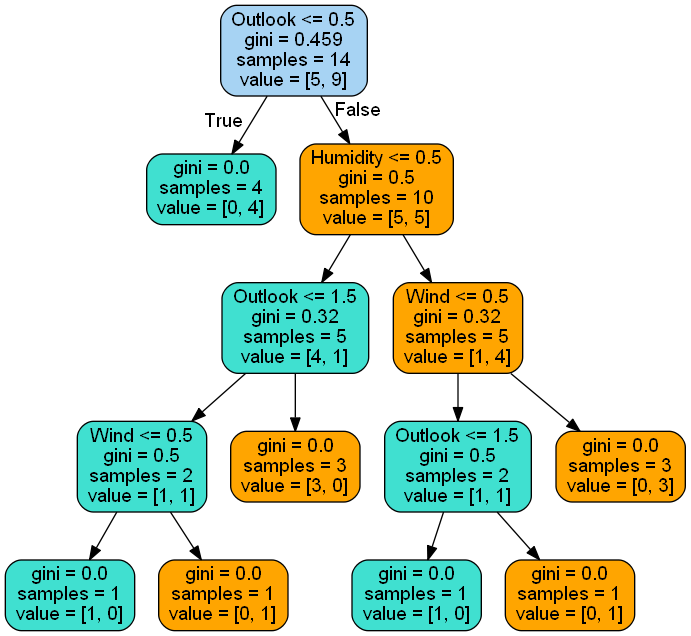

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

data_feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind']

dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')
Image(graph.create_png())

In [28]:
y_pred = clf.predict(X)
y_pred

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(Y,y_pred)*100)

Accuracy is  100.0


In [31]:
#Combination to test - outlook: Sunny, Temperature :Cool, Humidity: Normal, Wind: Strong
prediction = clf.predict([[2,0,1,0]]) 
print(prediction)

['Yes']
